#📌 **Delhi AQI Prediction Project**
# 🚀 **End-to-End Machine Learning Pipeline**

#📦 Phase 0: Import Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_path = "/content/drive/MyDrive/delhi-aqi-prediction"

folders = [
    "data/raw",
    "data/processed",
    "notebooks",
    "models",
    "plots",
    "requirements",
    "README"
]

for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)
    print(f"📁 Created: {path}")


📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/data/raw
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/data/processed
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/notebooks
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/models
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/plots
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/requirements
📁 Created: /content/drive/MyDrive/delhi-aqi-prediction/README


In [ ]:
# --- Import necessary libraries ---
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


#📥 Phase 1: Load & Explore Dataset

In [ ]:
# --- Load the dataset ---
file_path = "/content/drive/MyDrive/delhi-aqi-prediction/data/raw/city_day.csv"
df = pd.read_csv(file_path)

In [ ]:
# --- Filter for Delhi only ---
delhi_df = df[df['City'] == 'Delhi'].copy()
print("✅ Delhi data loaded. Shape:", delhi_df.shape)

✅ Delhi data loaded. Shape: (2009, 16)


In [ ]:
# --- Preview the data ---
display(delhi_df.head())

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [ ]:
# Check missing values
missing_values = delhi_df.isnull().sum()
print("🧹 Missing values:")
print(missing_values[missing_values > 0])


🧹 Missing values:
PM2.5           2
PM10           77
NO              2
NO2             2
NH3             9
SO2           110
O3             84
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64


In [ ]:
# Basic statistics
print("📊 Statistical Summary:")
display(delhi_df.describe())

# Check date range
print("📅 Date range:", delhi_df['Date'].min(), "to", delhi_df['Date'].max())



📊 Statistical Summary:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2007.000000,1932.000000,2007.000000,2007.000000,2009.000000,2000.000000,2009.000000,1899.000000,1925.00000,2009.000000,2009.000000,1228.000000,1999.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.32361,3.544480,17.185042,1.438339,259.487744
std,82.912945,121.873025,33.389456,22.696721,37.690350,17.301221,2.560253,7.966770,26.06234,2.431232,15.291597,2.377762,119.537333
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.94000,0.000000,0.000000,0.000000,29.000000
25%,57.095000,137.040000,15.895000,33.895000,31.150000,31.157500,0.910000,10.335000,33.71000,1.870000,6.650000,0.110000,161.500000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.44000,2.960000,12.750000,0.650000,257.000000
75%,153.030000,311.667500,50.790000,63.570000,75.360000,48.792500,1.870000,19.700000,60.84000,4.680000,23.200000,1.970000,345.500000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.73000,20.640000,103.000000,23.300000,716.000000


📅 Date range: 01-01-2015 to 31-12-2019


#🧹 Phase 2: Data Cleaning

In [ ]:
# Save Delhi data to processed folder
delhi_df.to_csv("/content/drive/MyDrive/delhi-aqi-prediction/data/processed/delhi_daily_aqi.csv", index=False)
print("💾 Saved clean Delhi data to: data/processed/delhi_daily_aqi.csv")

💾 Saved clean Delhi data to: data/processed/delhi_daily_aqi.csv


In [ ]:
# Check missing values again to decide cleaning strategy
delhi_df.isnull().sum()

,0
City,0
Date,0
PM2.5,2
PM10,77
NO,2
NO2,2
NOx,0
NH3,9
CO,0
SO2,110


In [ ]:
# Sort for time-consistent filling
delhi_df.sort_values('Date', inplace=True)

# Forward fill + then backfill any edge cases
delhi_df.fillna(method='ffill', inplace=True)
delhi_df.fillna(method='bfill', inplace=True)

# Final check
print("✅ Missing values after fill:", delhi_df.isnull().sum().sum())


✅ Missing values after fill: 0


#Phase 3: Model Building & Evaluation

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os


In [ ]:
# 📂 Load Cleaned Dataset
df = pd.read_csv("/content/drive/MyDrive/delhi-aqi-prediction/data/processed/delhi_daily_aqi.csv")
print("✅ Dataset loaded. Shape:", df.shape)
df.head()


✅ Dataset loaded. Shape: (2009, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [ ]:
# 🎯 Define Features and Target
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
target = 'AQI'

X = df[features]
y = df[target]


In [ ]:
# 🧼 Fill remaining missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# ✅ Confirm no missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: 0
Missing values in y: 0


In [ ]:
# 📊 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split done.")


✅ Data split done.


In [ ]:
# 🤖 Train Multiple Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} model trained.")


✅ Linear Regression model trained.
✅ Random Forest model trained.
✅ XGBoost model trained.


In [ ]:
# 📈 Evaluate Models
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n📊 {name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")



📊 Linear Regression Performance:
RMSE: 48.78
MAE: 35.60
R² Score: 0.8264

📊 Random Forest Performance:
RMSE: 33.20
MAE: 23.88
R² Score: 0.9196

📊 XGBoost Performance:
RMSE: 37.87
MAE: 27.26
R² Score: 0.8954


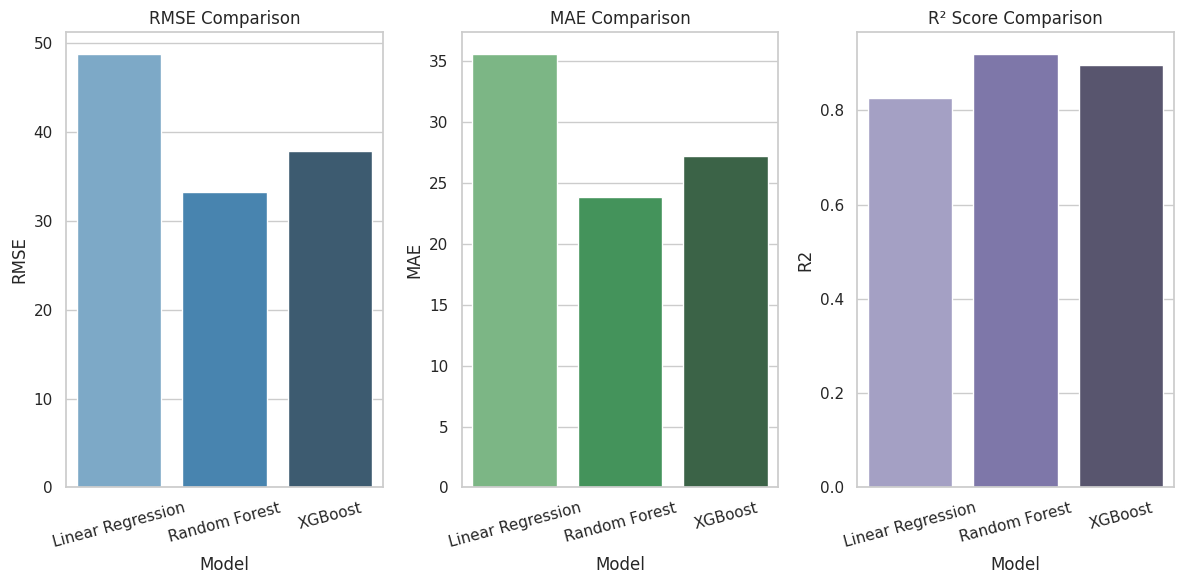

In [ ]:
# 📊 Visualizing Model Performance

import matplotlib.pyplot as plt
import seaborn as sns

# Store results for comparison
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

# Create a DataFrame
results_df = pd.DataFrame(results)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot RMSE
plt.subplot(1, 3, 1)
sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")
plt.title("RMSE Comparison")
plt.xticks(rotation=15)

# Plot MAE
plt.subplot(1, 3, 2)
sns.barplot(x="Model", y="MAE", data=results_df, palette="Greens_d")
plt.title("MAE Comparison")
plt.xticks(rotation=15)

# Plot R2 Score
plt.subplot(1, 3, 3)
sns.barplot(x="Model", y="R2", data=results_df, palette="Purples_d")
plt.title("R² Score Comparison")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


#💾 Phase 4: Save the Best Model

In [ ]:
# Cell 9: Train the model again (ensure it's defined in current session)
from xgboost import XGBRegressor

# Re-initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

print("✅ Model trained successfully.")


✅ Model trained successfully.


#🔍 Phase 5: Load & Predict

In [ ]:
# Cell 10: Save the trained model
import joblib

# Save to file
joblib.dump(xgb_model, 'xgboost_aqi_model.pkl')

print("✅ Model saved successfully as xgboost_aqi_model.pkl")


✅ Model saved successfully as xgboost_aqi_model.pkl


In [ ]:
# Cell 11: Load model and make a prediction
import joblib

# Load the model
loaded_model = joblib.load('xgboost_aqi_model.pkl')

# Predict using the first test sample
sample = X_test.iloc[0].values.reshape(1, -1)
predicted_aqi = loaded_model.predict(sample)

print(f"📌 Predicted AQI for first test sample: {predicted_aqi[0]:.2f}")


📌 Predicted AQI for first test sample: 370.43


#📊 Phase 6: Feature Importance Visualization

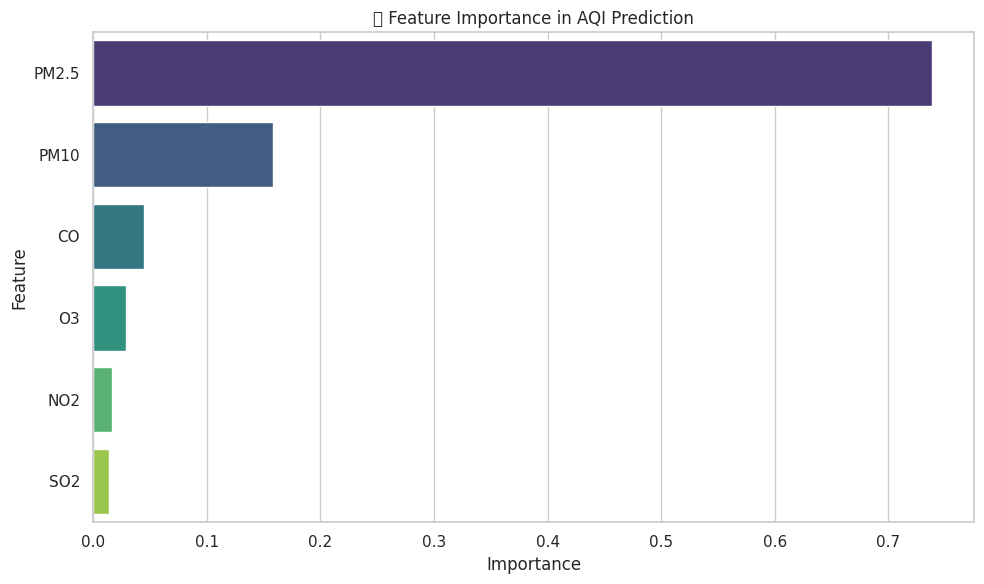

In [ ]:
# Cell 12: Feature Importance Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('📊 Feature Importance in AQI Prediction')
plt.tight_layout()
plt.show()


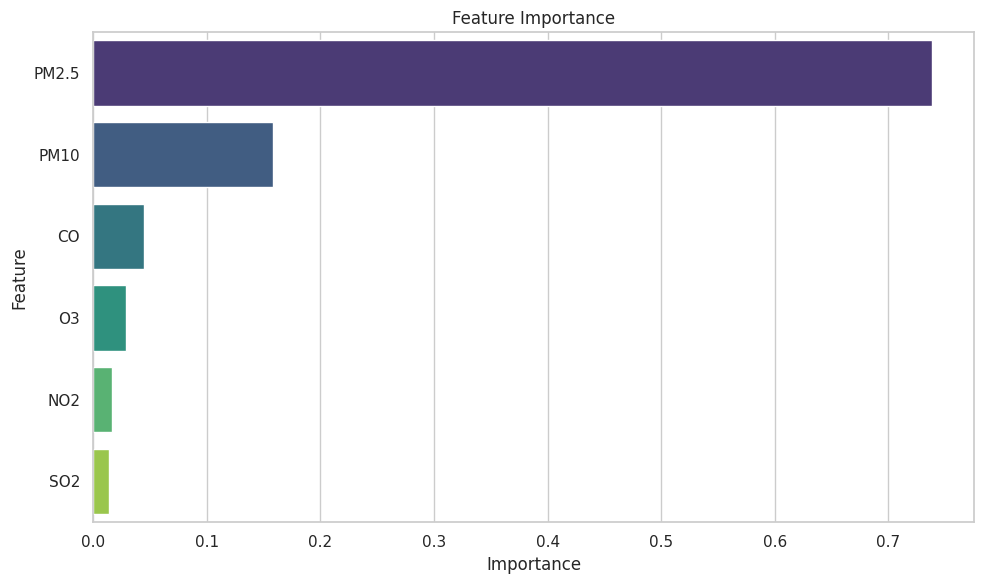

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
os.makedirs("plots", exist_ok=True)
# Example: Feature importance
importances = xgb_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("Feature Importance")
plt.tight_layout()

# Save to plots/
plt.savefig("plots/feature_importance.png")
plt.show()


In [ ]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load("/content/drive/MyDrive/delhi-aqi-prediction/models/xgboost_aqi_model.pkl")

# Load the cleaned data
df = pd.read_csv("/content/drive/MyDrive/delhi-aqi-prediction/data/processed/delhi_daily_aqi.csv")

# Ensure same features as used in training
feature_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
X = df[feature_cols]

# Predict using the model
predictions = model.predict(X)

# Display sample predictions
print("✅ Sample Predictions:", predictions[:10])


✅ Sample Predictions: [475.27753 400.18262 176.0507  324.6821  321.4761  324.27203 372.86435
 385.14188 375.2222  378.68607]
